In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from umap import UMAP

In [2]:
df = pd.read_csv("atussum_18.csv")

In [3]:
len(df.columns)

43

In [ ]:
list(df.columns)

In [5]:
drop_list = [ 'PEHSPNON',
              'TEMJOT',
              'TESCHENR',
              'TESCHLVL',
              'TUFNWGTP',
              'TU20FWGT']
df1 = df.drop(drop_list, axis=1)

In [6]:
def drop_dimensions(df_in):
    features = list(df_in.columns)
    # print(features)
    remove_list = ['TUCASEID', 'GEMETSTA', 'GTMETSTA', 'PEEDUCA', 'PTDTRACE', 'TEAGE', 'TELFS', 'TESEX', 'TESPEMPNOT', 'TRCHILDNUM', 'TRDPFTPT', 'TRERNWA', 'TRHOLIDAY', 'TRSPFTPT', 'TRSPPRES', 'TRYHHCHILD', 'TUDIARYDAY', 'TEHRUSLT', 'TUYEAR']
    for name in remove_list:
        features.remove(name)
    # print(features)
    df_out = df_in.drop(remove_list, axis=1)
    return df_out

def embedding(df, n_components=2, scale=True):
    pca_model = PCA(n_components=n_components)
    df2 = drop_dimensions(df)
    if scale == True:
        df3 = StandardScaler().fit_transform(df2)
    else: df3 = df2
    out = pca_model.fit_transform(df3)
    return out

def plot(df, out, label='TELFS'):
    plt.figure(figsize=(4, 4))
    plt.scatter(out[:,0], out[:,1], c=df[label])
    plt.xlabel('pc1')
    plt.ylabel('pc2')

Text(0, 0.5, 'pc2')

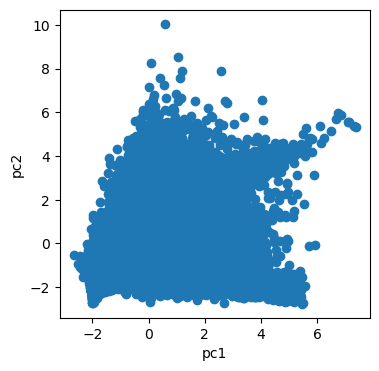

In [7]:
out = embedding(df1)
plt.figure(figsize=(4, 4))
plt.scatter(out[:,0], out[:,1])
plt.xlabel('pc1')
plt.ylabel('pc2')

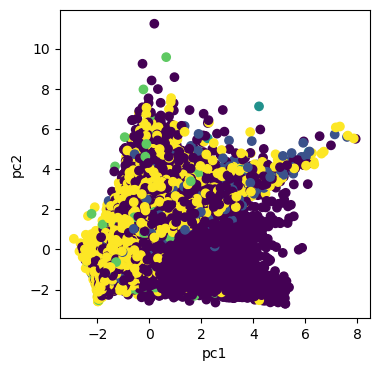

In [51]:
out = embedding(df1)
plot(df1, out)

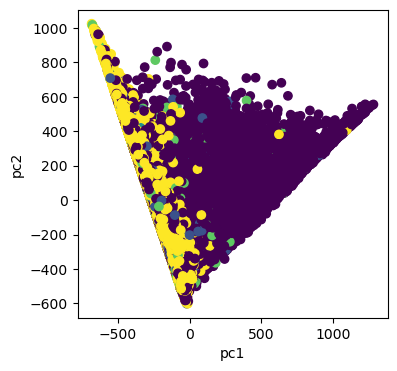

In [64]:
out_noscale = embedding(df1, scale=False)
plot(df1, out_noscale)

In [65]:
df_save = df.copy(deep=True)
df_save['pca1_noscale']=out_noscale[:,0]
df_save['pca2_noscale']=out_noscale[:,1]
df_save['pca1_scaled']=out[:,0]
df_save['pca2_scaled']=out[:,1]

In [66]:
df_save.to_csv('ATUS_pca_18_full.csv')

In [56]:
#people with work
df_work=df1[df1['TELFS']==1]
print(df_work.shape)

(134909, 37)


In [60]:
out_work = embedding(df_work)
print(out_work.shape)

(134909, 2)


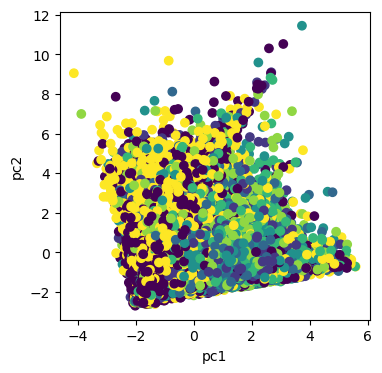

In [62]:
# print(df_work.shape, out_work.shape)
plot(df_work, out_work, label='TUDIARYDAY')

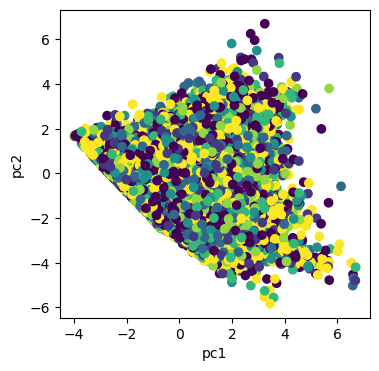

In [63]:
#without work
df_nowork=df1[df1['TELFS']!=1]
out_nowork = embedding(df_nowork)
plot(df_nowork, out_nowork, label='TUDIARYDAY')

In [68]:
df_work_save = df_work.copy(deep=True)
df_work_save['pca1']=out_work[:,0]
df_work_save['pca2']=out_work[:,1]
df_work_save.to_csv('ATUS_pca18_work.csv')

In [69]:
df_nowork_save = df_nowork.copy(deep=True)
df_nowork_save['pca1']=out_nowork[:,0]
df_nowork_save['pca2']=out_nowork[:,1]
df_nowork_save.to_csv('ATUS_pca18_nowork.csv')